# The Marvel Universe Social Network
### An artificial social network of heroes

Los datos fueron tomados de https://www.kaggle.com/csanhueza/the-marvel-universe-social-network

In [ ]:
pip install python-igraph

In [12]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [1]:
import chart_studio.plotly
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline 
from IPython.display import display
from PIL import Image
import networkx as nx
from pyvis.network import Network

In [2]:
e = pd.read_csv('C:/Users/july3/Downloads/edges.csv/edges.csv') # Edges
h = pd.read_csv('C:/Users/july3/Downloads/hero-network.csv~/hero-network.csv') # Hero
n = pd.read_csv("C:/Users/july3/Downloads/nodes.csv") # Nodes

In [3]:
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
nx.info(he)

'Name: \nType: Graph\nNumber of nodes: 6426\nNumber of edges: 167219\nAverage degree:  52.0445'

In [4]:
h= h.iloc[:10000,:2]
he = nx.from_pandas_edgelist(h, source = "hero1", target = "hero2")
print(nx.info(he))
he

Name: 
Type: Graph
Number of nodes: 674
Number of edges: 6255
Average degree:  18.5608


In [5]:
net = Network(notebook=True, width='800px', height='500px')
net.directed = True
net.from_nx(he)
net.show('example.html')

In [6]:
cliques = list(nx.find_cliques(he))

In [7]:
clique_number = len(list(cliques))
print(clique_number)

362


In [8]:
for clique in cliques:
    print(clique)

['LIGHTMASTER/EDWARD L', 'TARANTULA/ANTON MIGU', 'GRANT, GLORIA GLORY', 'PARKER, MAY', 'SPIDER-MAN/PETER PAR', 'WATSON, ANNA', 'ROBERTSON, JOE', 'THOMPSON, EUGENE FLA', 'KINGPIN/WILSON FISK', 'JAMESON, J. JONAH', 'WATSON-PARKER, MARY ']
['LIGHTMASTER/EDWARD L', 'TARANTULA/ANTON MIGU', 'GRANT, GLORIA GLORY', 'PARKER, MAY', 'SPIDER-MAN/PETER PAR', 'WATSON, ANNA', 'ROBERTSON, JOE', 'THOMPSON, EUGENE FLA', 'KINGPIN/WILSON FISK', 'JAMESON, J. JONAH', 'KRAVEN THE HUNTER/SE']
['LIGHTMASTER/EDWARD L', 'TARANTULA/ANTON MIGU', 'GRANT, GLORIA GLORY', 'PARKER, MAY', 'SPIDER-MAN/PETER PAR', 'WATSON, ANNA', 'ROBERTSON, JOE', 'THOMPSON, EUGENE FLA', 'SHA SHAN', 'WATSON-PARKER, MARY ']
['LIGHTMASTER/EDWARD L', 'TARANTULA/ANTON MIGU', 'GRANT, GLORIA GLORY', 'PARKER, MAY', 'SPIDER-MAN/PETER PAR', 'WATSON, ANNA', 'ROBERTSON, JOE', 'LIZARD/DR. CURTIS CO', 'JAMESON, J. JONAH', 'KINGPIN/WILSON FISK', 'WATSON-PARKER, MARY ']
['LIGHTMASTER/EDWARD L', 'TARANTULA/ANTON MIGU', 'GRANT, GLORIA GLORY', 'PARKER, MAY

In [39]:
#print(nx.ego_graph(he,'MARVEL GIRL/JEAN GRE',radius=2).nodes())

In [40]:
nx.algorithms.clique.cliques_containing_node(he,'MAGNETO/MAGNUS/ERIC ')

[['ROGUE /',
  'WOLVERINE/LOGAN ',
  'PSYLOCKE/ELISABETH B',
  'STORM/ORORO MUNROE S',
  'DAZZLER II/ALLISON B',
  'SUMMERS, MADELYNE MA',
  'HAVOK/ALEX SUMMERS ',
  'LONGSHOT',
  'COLOSSUS II/PETER RA',
  'GATEWAY',
  'MAGNETO/MAGNUS/ERIC ',
  'SUNSPOT/ROBERTO DACO',
  'WARLOCK III',
  'MIRAGE II/DANIELLE M',
  'CANNONBALL II/SAM GU',
  'WOLFSBANE/RAHNE SINC',
  'MAGIK/ILLYANA RASPUT']]

In [41]:
nx.algorithms.clique.cliques_containing_node(he,'MARVEL GIRL/JEAN GRE')

[['ARISHEM [CELESTIAL]',
  'CYCLOPS/SCOTT SUMMER',
  'ICEMAN/ROBERT BOBBY ',
  'ZIRAN',
  'BEAST/HENRY &HANK& P',
  'ANGEL/WARREN KENNETH',
  'GAMMENON [CELESTIAL]',
  'ONE ABOVE ALL [CELES',
  'MARVEL GIRL/JEAN GRE',
  'SUMMERS, NATHAN CHRI'],
 ['ROGUE /',
  'BLOB/FRED J. DUKES',
  'CYCLOPS/SCOTT SUMMER',
  'PROFESSOR X/CHARLES ',
  'MARVEL GIRL/JEAN GRE',
  'BEAST/HENRY &HANK& P'],
 ['ROGUE /',
  'WOLVERINE/LOGAN ',
  'PSYLOCKE/ELISABETH B',
  'STORM/ORORO MUNROE S',
  'DAZZLER II/ALLISON B',
  'SUMMERS, MADELYNE MA',
  'HAVOK/ALEX SUMMERS ',
  'LONGSHOT',
  'COLOSSUS II/PETER RA',
  'GATEWAY',
  'CYCLOPS/SCOTT SUMMER',
  'POLARIS/LORNA DANE',
  'MARVEL GIRL/JEAN GRE',
  'TILBY, TRISH/PATRICI'],
 ['ROGUE /',
  'WOLVERINE/LOGAN ',
  'PSYLOCKE/ELISABETH B',
  'STORM/ORORO MUNROE S',
  'DAZZLER II/ALLISON B',
  'SUMMERS, MADELYNE MA',
  'HAVOK/ALEX SUMMERS ',
  'LONGSHOT',
  'COLOSSUS II/PETER RA',
  'SUMMERS, NATHAN CHRI',
  'CYCLOPS/SCOTT SUMMER',
  'POLARIS/LORNA DANE',
  'MARVEL GIR

In [42]:
sorted_cliques = sorted(list(nx.find_cliques(he)),key=len)

In [43]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-3:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [44]:
max_clique = he.subgraph(max_clique_nodes)

In [45]:
print(nx.info(max_clique))

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 811
Average degree:  28.4561


In [46]:
net = Network(notebook=True, width='800px', height='500px')
net.directed = True
net.from_nx(max_clique)
net.show('example.html')

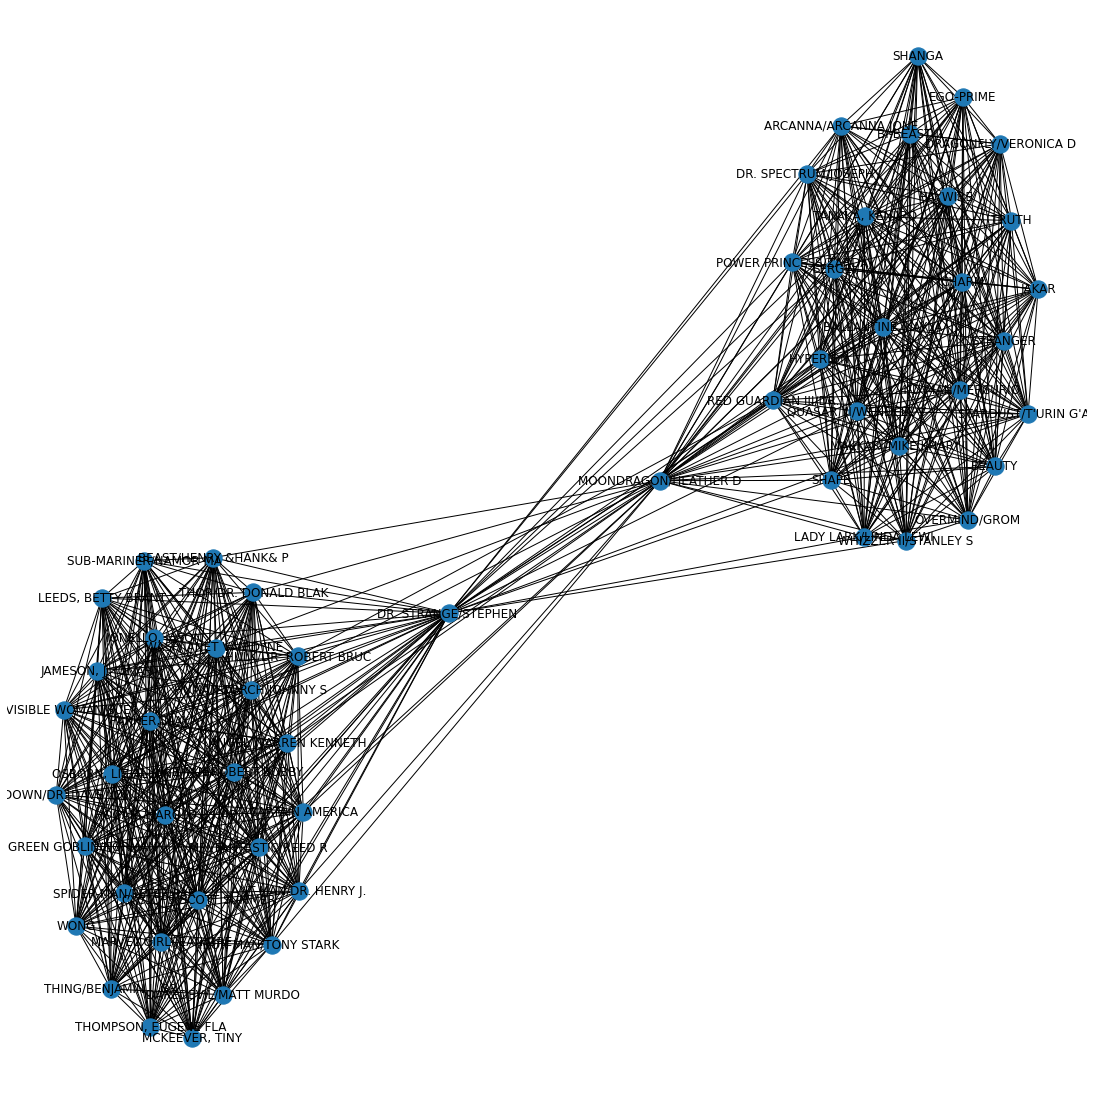

In [47]:
plt.figure(figsize=(15,15))
options = {
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(max_clique, pos=nx.spring_layout(max_clique, k=0.5, iterations=50), **options)
#ax = plt.gca()
#ax.collections[0].set_edgecolor("#555555") 
plt.show()

### ¿Qué?

Los datos estan en función de un diagrama de red, donde se encuentran todos los personajes del maravilloso Universo de MARVEL a partir de principios de los 60 hasta la fecha, se puede especular situaciones o miles de preguntas a raiz del analisis de las redes. Preguntas relacionadas con el hecho de que algun personaje ha estado relacionados con otros personajes, sea de manera directa o indirecta, de igual forma quien a ayudado mas a los demas y cosas relacionadas.


### ¿Por qué?

Se tiene una visualización tipo enjoy, se requiere extraer un subgrupo de personajes dentro de la base o red principal para tratar de que la visualización sea mas clara a la hora de encontrar una centralidad.

### ¿Cómo?

La visualización utilizará animación que permita resaltar un personaje al dar clic encima y esto resalte las conexiones directas de este. 

### Marcas y Canales

Cuenta con los nodos (círculos) y los enlaces de la red (líneas).
Canal de posición tanto vertical como horizontal.


### Cumple o no cumple alguna de las reglas generales descritas

Utiliza y se justifica la animación, sin embargo tiene problemas de oclusión graves lo que ocasiona que sea difícil identificar los personajes más relevantes de la trama. No utiliza 3D el cual no seria injustificado.

### Mejoras posibles, en cuánto a marcas o canales, que le realizaría a la visualización

La representación de la red no esperfecta, ya que no se puede visualizar la centralidad de las intermediaciones, lo cual seria un poco mas facil de ver a travez de un grafico 3D, se puede obtener mas información de este conjunto de datos lo que requiere un poco mas de tiempo y adentrarse a adquirir mas conocimientos de visualización en Redes, toda vez que el numero de personajes relacionados en la base de datos es demasiado grande lo que genera que las relación entre los mismo tenga problemas de oclusión. . 